In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/My\ Drive

/content/drive/My Drive


In [3]:
!ls

'22 Dec, 10.40 PM, One More Light.mp3'
'Artificial Intelligence over a cup of coffee.gdoc'
'Audio recording'
 cats_dogs_keras.ipynb
 Classroom
'CMC hostel day 15'
'Colab Notebooks'
'Contact Information.gform'
'Data Science'
 decision-tree-visual.ipynb
'Deep Learning .gdoc'
 dogs-vs-cats-train-validadion-and-evaluation.zip
 DSC01379.JPG
'G101H40AdmitCard copy.pdf'
'Gate 18'
'Generative Model Notes.gdoc'
 handwritten
 IMG-20140930-WA0004.jpg
 IMG_20190413_160413.jpg
 IMG_20190413_160613.jpg
 InputFiles.gsheet
 InputFiles.xlsx
 Javascript.gdoc
'Karunya worship 2011'
'Lesson plan.gdoc'
 __MACOSX
 Melissa.mp4
'Nitt souvenir '
 Outputfile.gsheet
 Outputfile.xlsx
 PC030527.JPG
 PetImages.zip
'PetImages.zip (Unzipped Files)'
 Photos
'Picture 482.jpg'
'Planning Fallacy-LOAR_LP_Remastered.mp3'
'Promo Video.mp4'
'Python 1030 weekend.gdoc'
'reconciliation pick 20-02-2013.jpeg'
 Resumè.docx
'Resume .pdf'
'Test yourself.gform'
'The Book on AI.gdoc'
'Twitter Sentiment .mp4'
 Wallpapers
'WhatsApp Ima

In [4]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras import backend
from keras.models import Model

import time

from scipy.optimize import fmin_l_bfgs_b

Using TensorFlow backend.


In [0]:
def load_image(image_path):
    image = Image.open(image_path)
    return image

In [0]:
image = load_image('DSC01379.JPG')

In [0]:
def resize_image(image, h, w):
    resized_image = image.resize((h, w))
    return resized_image

In [0]:
h = 512
w = 512

In [9]:
!pwd

/content/drive/My Drive


In [10]:
import os

STYLE_ROOT = "Wallpapers/Style/"
CONTENT_ROOT = "Wallpapers/content/"

style_images = os.listdir(STYLE_ROOT)
content_images = os.listdir(CONTENT_ROOT)

print(style_images)
print(content_images)

['abstract-abstract-expressionism-art-2911519.jpg']
['wolf_howling_at_the_moon-wallpaper-1680x1050.jpg', 'bike.jpg', 'crowd.jpg']


In [0]:
style_img_path = STYLE_ROOT + style_images[-1]

style_img = load_image(style_img_path)
style_img_resized = resize_image(style_img, h, w)

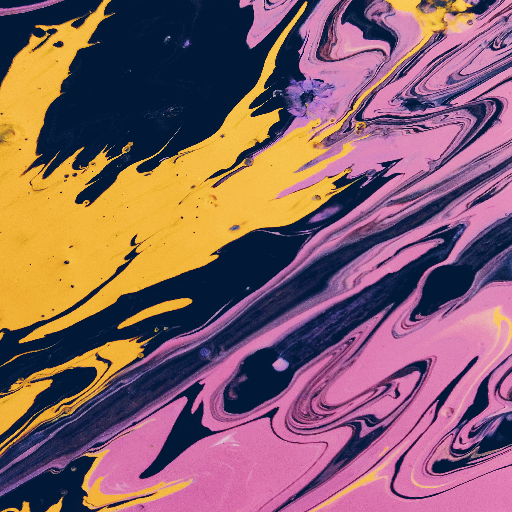

In [12]:
style_img_resized

In [0]:
content_img_path = CONTENT_ROOT + content_images[-1]
content_img = load_image(content_img_path)
content_img_resized = resize_image(content_img, h, w)

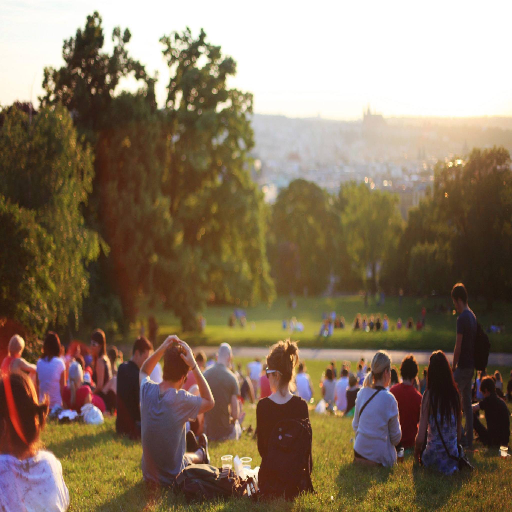

In [14]:
content_img_resized

In [0]:
style_img_array = np.asarray(style_img_resized, dtype="float32")
content_img_array = np.asarray(content_img_resized, dtype="float32")

In [0]:
style_img_array = np.expand_dims(style_img_array, axis=0)
content_img_array = np.expand_dims(content_img_array, axis=0)

In [17]:
print(content_img_array.shape)
print(style_img_array.shape)

(1, 512, 512, 3)
(1, 512, 512, 3)


In [0]:
AVG_RGB = np.array([103.939, 116.779, 123.68])

In [0]:
def convert_to_bgr(image_array):
    return image_array[:, :, :, ::-1]

In [0]:
style_array = style_img_array - AVG_RGB
content_array = content_img_array - AVG_RGB

In [0]:
conv_style = convert_to_bgr(style_array)
conv_content = convert_to_bgr(content_array)

In [0]:
style_var = backend.variable(conv_style)
content_var = backend.variable(conv_content)

In [23]:
combination_img = backend.placeholder((1, h, w, 3))

In [0]:
input_tensor = backend.concatenate([content_var, style_var, combination_img], axis = 0)

In [25]:
model = VGG16(input_tensor=input_tensor, weights="imagenet", include_top=False)

In [26]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(3, 512, 512, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(3, 512, 512, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(3, 256, 256, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(3, 256, 256, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(3, 256, 256, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(3, 128, 128, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(3, 128, 128, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(3, 128, 128, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(3, 128, 128, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(3, 64, 64, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(3, 64, 64, 512) dtype=float32>,
 'b

In [27]:
model.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [28]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [29]:
np.random.rand(1)

array([0.41584668])

In [0]:

# arbitrary values

content_weight = np.random.rand(1)
style_weight = np.random.rand(1)
total_variation_weight = np.random.rand(1)

In [0]:
loss = backend.variable(0.)

In [0]:
def get_content_loss(content, combo):
    return backend.sum(backend.square(content - combo))

In [33]:
layer_features = layers['block2_conv2']
content_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]

loss += content_weight * get_content_loss(content_image_features, combination_features)

In [0]:
def gram_matrix(x):
    features = backend.batch_flatten(backend.permute_dimensions(x, (2, 0, 1)))
    gram = backend.dot(features, backend.transpose(features))
    return gram

In [0]:
def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = h * w
    return backend.sum(backend.square(S - C)) / (4. * (channels ** 2) * (size ** 2))

In [0]:
feature_layers = ['block1_conv2', 'block2_conv2',
                  'block3_conv3', 'block4_conv3',
                  'block5_conv3']

In [0]:
for layer_name in feature_layers:
    layer_features = layers[layer_name]
    style_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_features, combination_features)
    loss += (style_weight / len(feature_layers)) * sl

In [0]:
def total_variation_loss(x):
    a = backend.square(x[:, :h-1, :w-1, :] - x[:, 1:, :w-1, :])
    b = backend.square(x[:, :h-1, :w-1, :] - x[:, :h-1, 1:, :])
    return backend.sum(backend.pow(a + b, 1.25))

In [0]:
grad = backend.gradients(loss, combination_img)

In [0]:
outputs = [loss]
outputs += grad
f_outputs = backend.function([combination_img], outputs)

In [0]:
def eval_loss_and_grads(x):
    x = x.reshape((1, h, w, 3))
    outs = f_outputs([x])
    loss_value = outs[0]
    grad_values = outs[1].flatten().astype('float64')
    return loss_value, grad_values

In [0]:
class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        loss_value, grad_values = eval_loss_and_grads(x)
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

In [0]:
evaluator = Evaluator()

In [45]:
x = np.random.uniform(0, 255, (1, h, w, 3)) - 128.

iterations = 20

for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x.flatten(),
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    end_time = time.time()
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Start of iteration 0
Current loss value: [1.23877474e+11]
Iteration 0 completed in 24s
Start of iteration 1
Current loss value: [8.604433e+10]
Iteration 1 completed in 15s
Start of iteration 2
Current loss value: [6.7451453e+10]
Iteration 2 completed in 15s
Start of iteration 3
Current loss value: [5.5221957e+10]
Iteration 3 completed in 15s
Start of iteration 4
Current loss value: [4.7657325e+10]
Iteration 4 completed in 15s
Start of iteration 5
Current loss value: [4.273455e+10]
Iteration 5 completed in 15s
Start of iteration 6
Current loss value: [3.918087e+10]
Iteration 6 completed in 15s
Start of iteration 7
Current loss value: [3.6597805e+10]
Iteration 7 completed in 15s
Start of iteration 8
Current loss value: [3.468434e+10]
Iteration 8 completed in 15s
Start of iteration 9
Current loss value: [3.313498e+10]
Iteration 9 completed in 15s
Start of iteration 10
Current loss value: [3.179012e+10]
Iteration 10 completed in 15s
Start of iteration 11
Current loss value: [3.0613346e+10]

In [0]:
x = x.reshape((h, w, 3))

In [0]:
x = x[:, :, ::-1]

In [0]:
x = x + AVG_RGB

In [0]:
x = np.clip(x, 0, 255).astype("uint8")

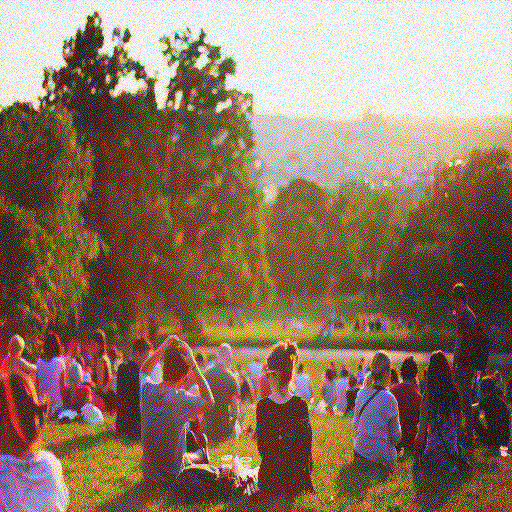

In [50]:
Image.fromarray(x)

In [51]:
np.argmin(np.array([1,2,3,4]))

0